### Multiple Logistic Regression 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
customers=pd.read_csv('customer_data.csv')
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 165.1+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [3]:
import pandas as pd
churn=pd.read_csv('churn_data.csv')
churn.info()
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 302.7+ KB


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
import pandas as pd
internet=pd.read_csv('internet_data.csv')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 247.7+ KB


In [5]:
temp=pd.merge(customers,churn,how='inner',on='customerID')
temp.info()
telecom=pd.merge(temp,internet,how='inner',on='customerID')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 495.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column     

In [6]:
def b_map(x):
  return x.map({'Yes':1,'No':0})

# apply the map function
varlist=['PaperlessBilling','PhoneService','Churn','Dependents','Partner']
telecom[varlist]=telecom[varlist].apply(b_map)
telecom[varlist].head()

,PaperlessBilling,PhoneService,Churn,Dependents,Partner
0,1,0,0,0,1
1,0,1,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0


In [7]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,29.85,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,1889.5,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,108.15,1,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,151.65,1,No,Fiber optic,No,No,No,No,No,No


In [8]:
#Month_to_Month,One_year,Two_year
#transform all muticlass attributes to binary
d1=pd.get_dummies(telecom[['Contract','PaymentMethod','gender',
                           'InternetService']])
d1

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,1,0,0
2,1,0,0,0,0,0,1,0,1,1,0,0
3,0,1,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,0,1,0,1,1,0,0
7039,0,1,0,0,1,0,0,1,0,0,1,0
7040,1,0,0,0,0,1,0,1,0,1,0,0
7041,1,0,0,0,0,0,1,0,1,0,1,0


In [9]:
telecom=pd.concat([telecom,d1],axis=1)
telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,0,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,0,0,0,0,1,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,0,0,0,0,1,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,0,1,0,0,0,0,1,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,One year,1,Mailed check,...,0,0,0,0,1,0,1,1,0,0
7039,2234-XADUH,Female,0,1,1,72,1,One year,1,Credit card (automatic),...,0,0,1,0,0,1,0,0,1,0
7040,4801-JZAZL,Female,0,1,1,11,0,Month-to-month,1,Electronic check,...,0,0,0,1,0,1,0,1,0,0
7041,8361-LTMKD,Male,1,1,0,4,1,Month-to-month,1,Mailed check,...,0,0,0,0,1,0,1,0,1,0


In [10]:
telecom=telecom.drop(['Contract','PaymentMethod','gender','InternetService'], 
                     axis=1)

In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines                            7043 no

In [12]:
telecom['MultipleLines']

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object

In [13]:
d2=pd.get_dummies(telecom[['MultipleLines','OnlineSecurity','OnlineBackup',
                           'DeviceProtection','TechSupport','StreamingTV',
                           'StreamingMovies']])
d2

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,0,0,1,1,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,1
7040,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [14]:
telecom=pd.concat([telecom,d2],axis=1)
telecom

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.5,0,...,1,0,0,1,0,0,1,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.9,0,...,1,1,0,0,0,0,1,0,0,1
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.6,1,...,0,1,0,0,1,0,0,1,0,0


In [15]:
telecom=telecom.drop(['MultipleLines','OnlineSecurity','OnlineBackup',
                      'DeviceProtection','TechSupport','StreamingTV',
                      'StreamingMovies'],axis=1)

In [16]:
telecom

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.5,0,...,1,0,0,1,0,0,1,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.9,0,...,1,1,0,0,0,0,1,0,0,1
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.6,1,...,0,1,0,0,1,0,0,1,0,0


In [17]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [18]:
telecom['PhoneService'].count()

7043

In [19]:
telecom['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

In [20]:
telecom['PhoneService'].astype('category').value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [21]:
telecom['MultipleLines_No phone service'].count()

7043

In [22]:
telecom['MultipleLines_No phone service'].astype('category').value_counts()

0    6361
1     682
Name: MultipleLines_No phone service, dtype: int64

In [23]:
#drop redundant columns
telecom = telecom.drop('MultipleLines_No phone service', axis = 1)

In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [25]:
telecom = telecom.drop(['OnlineSecurity_No internet service', 
                       'OnlineBackup_No internet service',
                       'DeviceProtection_No internet service',
                       'TechSupport_No internet service',
                       'StreamingTV_No internet service',
                       'StreamingMovies_No internet service'], axis = 1)

In [26]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [27]:
#convert total charges to numeirc value
telecom['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [28]:
#conver total charges to numeric value
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors = 'coerce')

In [29]:
telecom['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [30]:
#check are there any outliers
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen',
                       'TotalCharges']]

In [31]:
num_telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
max,72.000000,118.750000,1.000000,8684.800000


In [32]:
num_telecom.describe(percentiles = [.25, .50, .60, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
60%,40.000000,79.100000,0.000000,2048.950000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000


In [33]:
#identify columns with missing values
telecom.isnull().sum()

customerID                                  0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
gender_Female                               0
gender_Male                                 0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                

In [34]:
# 11 out of 7043 is very less
import numpy as np
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [35]:
telecom.isnull().sum()

customerID                                 0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
gender_Female                              0
gender_Male                                0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
MultipleLi

In [36]:
#train and test split
X = telecom.drop(['customerID', 'Churn'], axis = 1)

In [37]:
X.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,1,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,1,1,0,1,0,1,0,1,0


In [38]:
y = telecom['Churn']

In [39]:
y.head(4)

0    0
1    0
2    1
3    0
Name: Churn, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [42]:
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
879,0.019693,-0.338074,-0.276449
5790,0.305384,-0.464443,-0.112702
6498,-1.286319,0.581425,-0.974430
880,-0.919003,1.505913,-0.550676
2784,-1.163880,1.106854,-0.835971
...,...,...,...
79,0.509448,-1.294154,-0.474260
3934,-0.919003,-0.816946,-0.829291
5964,0.672699,-0.101964,0.322781
6947,1.448144,1.204956,1.974736


In [43]:
#find churn rate
#total of yes / total records
churn_r = (sum(telecom['Churn']) / len(telecom['Churn'].index)) * 100

In [44]:
churn_r

26.578498293515356

<AxesSubplot:>

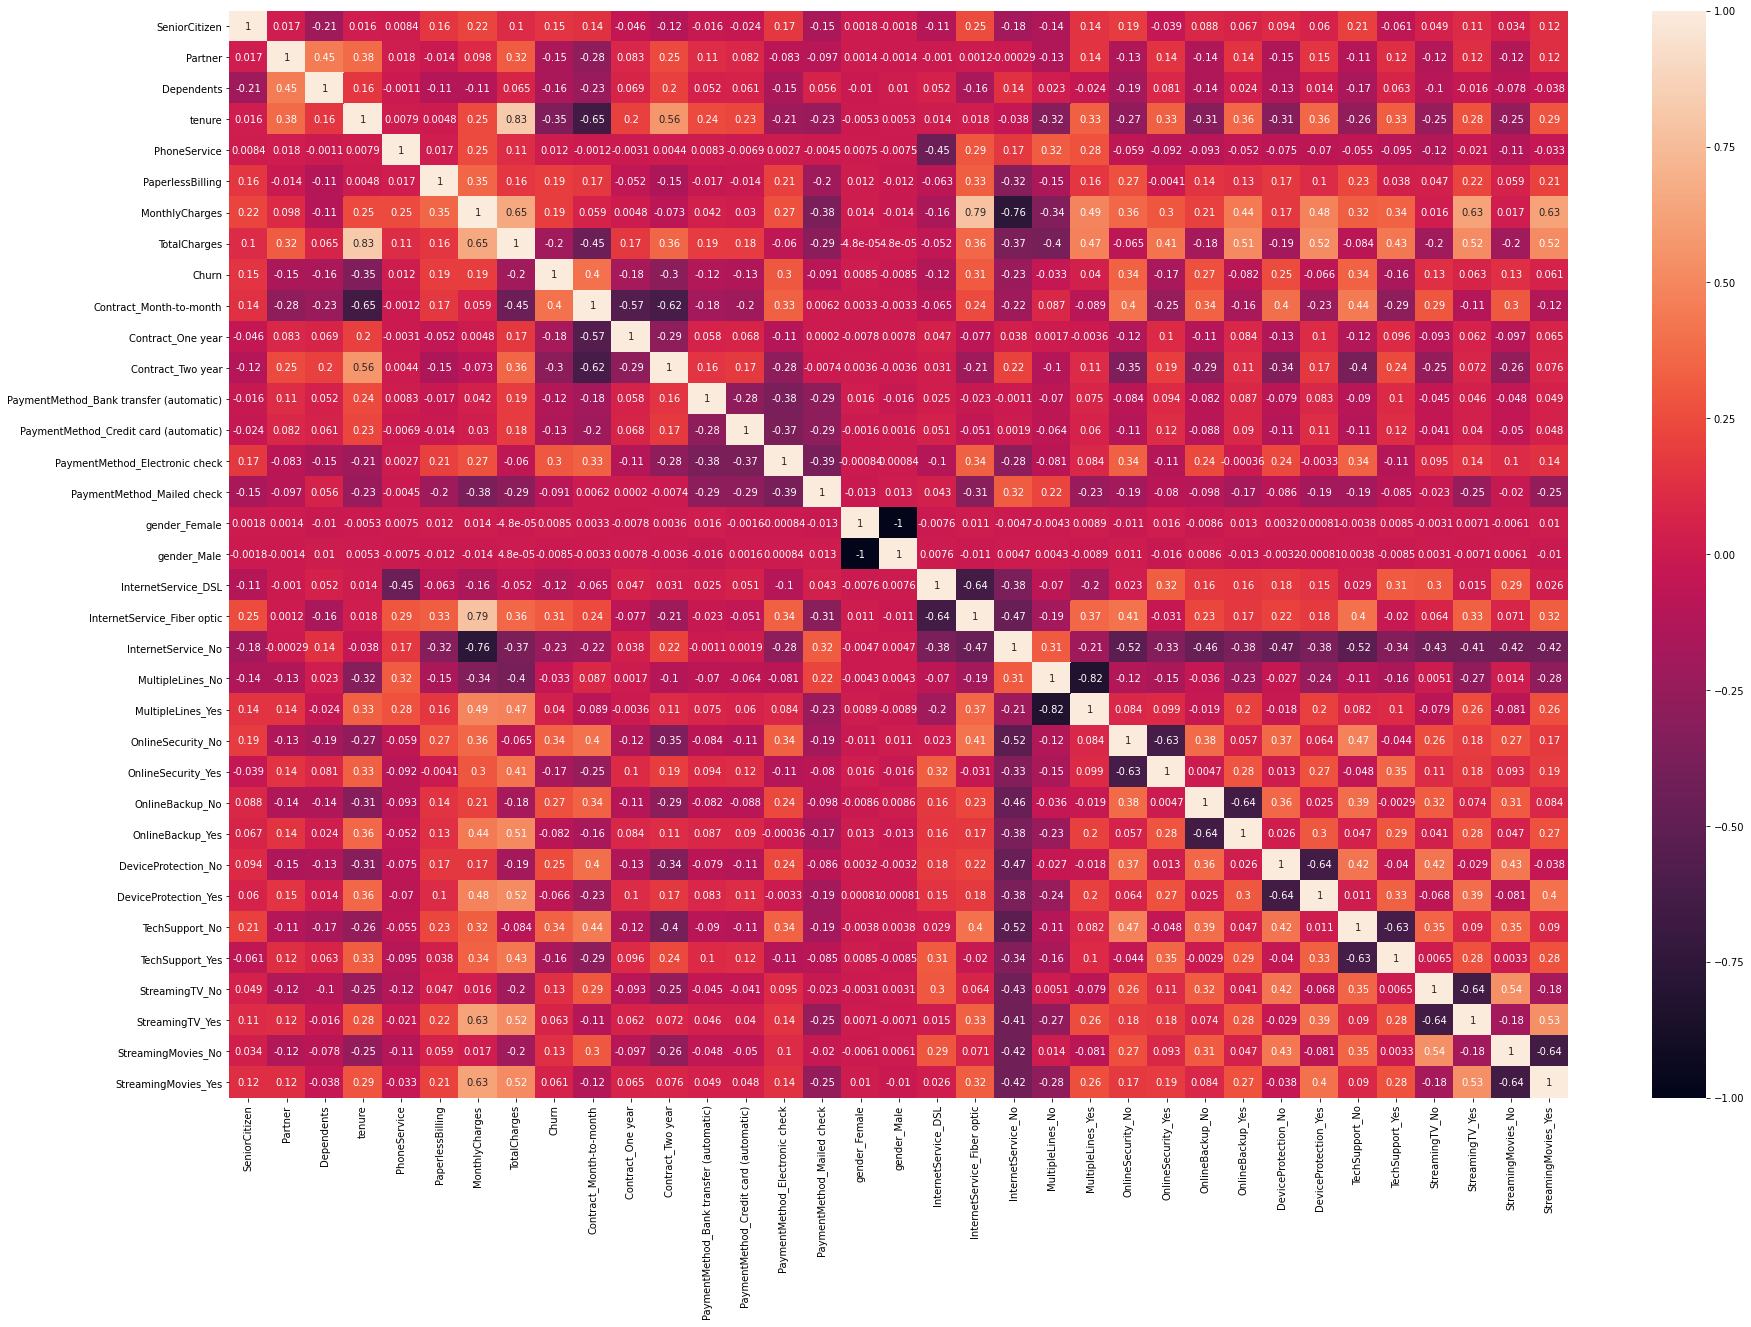

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlations map
plt.figure(figsize = (30, 20))
sns.heatmap(telecom.corr(), annot = True)

In [46]:
import statsmodels.api as sm

In [47]:
#build model 
churnModel = sm.GLM(y_train, sm.add_constant(X_train),
                    family = sm.families.Binomial())

In [48]:
churnModel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 18 Jul 2021   Deviance:                       4009.4
Time:                        20:25:52   Pearson chi2:                 5.96e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.1968      0.700     -3.139      0.002      -3.568      -0.825
SeniorCitizen                               0.3960      0.101      3.930      0.000       0.198       0.594
Partner                                     0.0376      0.093      0.406      0.685      -0.144       0.219
Dependents                                 -0.1424      0.106     -1.345      0.179      -0.350       0.065
tenure                                     -1.4953      0.179     -8.376      0.000      -1.845      -1.145
PhoneService                                0.8206      0.584      1.405      0.160      -0.324       1.965
PaperlessBilling                            0.3227      0.089      3.625      0.000       0.148       0.497
MonthlyCharges                             -2.1739      1.151     -1.889      0.059      -4.429       0.082
TotalCharges                                0.7153      0.188      3.805      0.000       0.347       1.084
Contract_Month-to-month                    -0.1033      0.249     -0.415      0.678      -0.591       0.384
Contract_One year                          -0.7554      0.247     -3.059      0.002      -1.239      -0.271
Contract_Two year                          -1.3381      0.271     -4.946      0.000      -1.868      -0.808
PaymentMethod_Bank transfer (automatic)    -0.4628      0.192     -2.408      0.016      -0.839      -0.086
PaymentMethod_Credit card (automatic)      -0.7179      0.194     -3.709      0.000      -1.097      -0.339
PaymentMethod_Electronic check             -0.3016      0.186     -1.625      0.104      -0.665       0.062
PaymentMethod_Mailed check                 -0.7146      0.194     -3.692      0.000      -1.094      -0.335
gender_Female                              -1.0814      0.352     -3.070      0.002      -1.772      -0.391
gender_Male                                -1.1154      0.352     -3.171      0.002      -1.805      -0.426
InternetService_DSL                        -0.9251      0.315     -2.941      0.003      -1.542      -0.309
InternetService_Fiber optic                 1.5810      0.646      2.447      0.014       0.315       2.847
InternetService_No                         -2.8527      1.033     -2.762      0.006      -4.877      -0.829
MultipleLines_No                            0.1301      0.203      0.640      0.522      -0.268       0.529
MultipleLines_Yes                           0.6904      0.389      1.774      0.076      -0.073       1.453
OnlineSecurity_No                           0.3404      0.088      3.868      0.000       0.168       0.513
OnlineSecurity_Yes                          0.3155      0.267      1.181      0.238      -0.208       0.839
OnlineBackup_No                             0.2405      0.0

In [49]:
# RFE- Recursive Feature Elimination

#criteria- logreg
#number of features

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [50]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)

In [51]:
rfe = rfe.fit(X_train, y_train)

In [52]:
rfe.support_

array([ True, False, False,  True, False,  True, False,  True,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False])

In [53]:
rfe.ranking_

array([ 1, 17, 12,  1, 14,  1,  3,  1,  1, 19,  1, 13,  1,  9,  1, 18, 20,
        8,  1,  2,  5, 15,  1, 21, 10, 11,  7,  6,  1, 22, 23,  1, 16,  4])

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 17),
 ('Dependents', False, 12),
 ('tenure', True, 1),
 ('PhoneService', False, 14),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 3),
 ('TotalCharges', True, 1),
 ('Contract_Month-to-month', True, 1),
 ('Contract_One year', False, 19),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 13),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 9),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Female', False, 18),
 ('gender_Male', False, 20),
 ('InternetService_DSL', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 2),
 ('MultipleLines_No', False, 5),
 ('MultipleLines_Yes', False, 15),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 21),
 ('OnlineBackup_No', False, 10),
 ('OnlineBackup_Yes', False, 11),
 ('DeviceProtection_No', False, 7),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_No'

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No',
       'StreamingTV_Yes'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'MonthlyCharges',
       'Contract_One year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Electronic check', 'gender_Female', 'gender_Male',
       'InternetService_DSL', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [57]:
X_train_sm = sm.add_constant(X_train[col])
churnModel2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = churnModel2.fit()

In [58]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.5
Date:                Sun, 18 Jul 2021   Deviance:                       4039.1
Time:                        20:25:54   Pearson chi2:                 6.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9861      0.146    -20.479      0.000      -3.272      -2.700
SeniorCitizen                             0.4506      0.099      4.543      0.000       0.256       0.645
tenure                                   -1.4579      0.177     -8.220      0.000      -1.805      -1.110
PaperlessBilling                          0.3591      0.089      4.028      0.000       0.184       0.534
TotalCharges                              0.6893      0.178      3.872      0.000       0.340       1.038
Contract_Month-to-month                   0.7077      0.127      5.557      0.000       0.458       0.957
Contract_Two year                        -0.5671      0.211     -2.689      0.007      -0.980      -0.154
PaymentMethod_Credit card (automatic)    -0.3774      0.113     -3.354      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.4047      0.110     -3.691      0.000      -0.620      -0.190
InternetService_Fiber optic               0.6555      0.110      5.976      0.000       0.440       0.870
OnlineSecurity_No                         0.4718      0.094      5.007      0.000       0.287       0.656
TechSupport_No                            0.4709      0.094      5.008      0.000       0.287       0.655
StreamingTV_Yes                           0.3185      0.094      3.393      0.001       0.135       0.502
=========================================================================================================
"""

In [59]:
y_pred = res.predict(X_train_sm)
y_pred[:10]

879     0.232217
5790    0.234876
6498    0.707347
880     0.503721
2784    0.656340
3874    0.462406
5387    0.316363
6623    0.791062
4465    0.181072
5364    0.488536
dtype: float64

In [60]:
y_pred = y_pred.values.reshape(-1)
y_pred[:10]

array([0.2322168 , 0.23487558, 0.70734661, 0.50372126, 0.65633952,
       0.4624064 , 0.31636253, 0.79106227, 0.18107165, 0.48853575])

In [61]:
#original value in X-train - predicted value in y_pred
y_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_pred})
y_pred_final['CustID'] = y_train.index

In [62]:
y_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.232217,879
1,0,0.234876,5790
2,1,0.707347,6498
3,1,0.503721,880
4,1,0.656340,2784


In [63]:
from sklearn import metrics

In [64]:
y_pred_final['pred'] = y_pred_final.Churn_prob.map(lambda x:1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,Churn_prob,CustID,pred
0,0,0.232217,879,0
1,0,0.234876,5790,0
2,1,0.707347,6498,1
3,1,0.503721,880,1
4,1,0.656340,2784,1


In [65]:
conf = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.pred)
print(conf)

[[3266  369]
 [ 596  691]]


In [66]:
acc = metrics.accuracy_score(y_pred_final.Churn, y_pred_final.pred)
print(acc)

0.8039414872003251
